# Lending Club Case Study

__Problem Statement:__ The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are __two types of decisions__ that could be taken by the company:

1. __Loan accepted:__ If the company approves the loan, there are 3 possible scenarios described below:
    - __Fully paid:__ Applicant has fully paid the loan (the principal and the interest rate)
    - __Current:__ Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - __Charged-off:__ Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. __Loan rejected:__ The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

- Find out which columns are needed to solve business problem
- corelation


## Importing Necessary Library

In [1]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings('ignore')

## Load the data 

In [2]:
df=pd.read_csv("loan/loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(39717, 111)

## Data Understanding 
## Remove unwanted columns

In [4]:
df.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 111, dtype: float64

In [5]:
# get all columns with null or NA values for all rows
columns_with_null = df.columns[df.isnull().all()]
columns_with_null.size

54

In [6]:
# drop all columns with null or NA values for all rows
df.drop(columns=columns_with_null, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [8]:
# if a column has same values in all rows it will not be able to give any insights so drop the same
unique_counts = df.nunique()
columns_with_unique_values = unique_counts[unique_counts == 1].index.tolist()
columns_with_unique_values

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [9]:
# drop all columns with unique values
df.drop(columns=columns_with_unique_values, inplace=True)

In [10]:
# drop columns not inmportant or not required for analysis
#id and member id
df.drop(["id", "member_id"],axis=1, inplace=True)
#desc & url
df.drop(["url", "desc"],axis=1, inplace=True)
# emp_title, title - These are names of establishment etc which will not contribute to loan pass or failure
df.drop(["emp_title", "title"],axis=1, inplace=True)
# Dropping all columns which refer to behavoural data of customer post loan approval, 
# the data is not available at the time of loan approval
df.drop(['delinq_2yrs', 'earliest_cr_line', 
                          'inq_last_6mths', 'open_acc', 'pub_rec', 
                          'revol_bal', 'revol_util', 'total_acc', 
                          'out_prncp', 'out_prncp_inv', 'total_pymnt', 
                          'total_pymnt_inv', 'total_rec_prncp', 
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                          'collection_recovery_fee', 'last_pymnt_d', 
                          'last_pymnt_amnt', 'last_credit_pull_d'],  axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_length              38642 non-null  object 
 9   home_ownership          39717 non-null  object 
 10  annual_inc              39717 non-null  float64
 11  verification_status     39717 non-null  object 
 12  issue_d                 39717 non-null  object 
 13  loan_status             39717 non-null  object 
 14  purpose                 39717 non-null

## Missing Value Check

In [12]:
100*df.isnull().mean()

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
next_pymnt_d              97.129693
pub_rec_bankruptcies       1.754916
dtype: float64

In [13]:
#drop columns with more than 60% null values
df.drop("mths_since_last_delinq",axis=1, inplace=True)
df.drop("mths_since_last_record",axis=1, inplace=True)
df.drop("next_pymnt_d",axis=1, inplace=True)

In [14]:
100*df.isnull().mean()

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

## Loan status

In [15]:
#analyzing unique value of loan_status column
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

There are 3 distinct values but the loan status <b>"Current"</b> doesn't give any information for approving or rejecting loan application. So, we can drop the rows having value current.

In [16]:
#dropping rows having value current
df = df[df["loan_status"] != 'Current']
#checking shape
df.shape

(38577, 19)

## Term

In [17]:
#analyzing unique value of term column
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

We can see that there is a empty space at the start of the term values. So let's remove it.

In [18]:
#Stripping empty space in values in term
df["term"] = df.term.str.strip()
df.term.unique()

array(['36 months', '60 months'], dtype=object)

## Data types - Clean up

In [19]:
#analyzing data type in each column
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

<b>issue_d</b> is having date values, so we can convert the data type "object" to "date" 

In [20]:
#converting to date type
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')

In [21]:
#analysing int_rate and revol_util column
df["int_rate"]

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object

Here we can observe that the column have "%" because of which it is showing data type - Object.
So we can remove "%" and convert it into float data type.

In [22]:
# clean up
df['int_rate'] = df.int_rate.str.strip('%').astype(float)

In [23]:
# clean up
df["emp_length"] = df["emp_length"].apply(lambda x: 0 if '<' in str(x) else(0 if(str(x) == 'n/a') else (0 if str(x) == 'nan' else str(x).replace('+', '').replace('years', '').replace('year','').strip())))
df["emp_length"] = df["emp_length"].astype(int)
df["emp_length"]

0        10
1         0
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38577, dtype: int32

## Update null values with mode or median for pub_rec_bankruptcies

In [24]:
100*df.isnull().mean()

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [25]:
df["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

In [26]:
print('mean of pub_rec_bankruptcies',df['pub_rec_bankruptcies'].mean())
print('mode of pub_rec_bankruptcies',df['pub_rec_bankruptcies'].mode())
print('median of pub_rec_bankruptcies',df['pub_rec_bankruptcies'].median())

mean of pub_rec_bankruptcies 0.04347940865892291
mode of pub_rec_bankruptcies 0    0.0
Name: pub_rec_bankruptcies, dtype: float64
median of pub_rec_bankruptcies 0.0


In [27]:
# fill missing values with mode/median
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(0.0)

In [28]:
100*df.isnull().mean()

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

## Outlier treatment

<Axes: xlabel='annual_inc'>

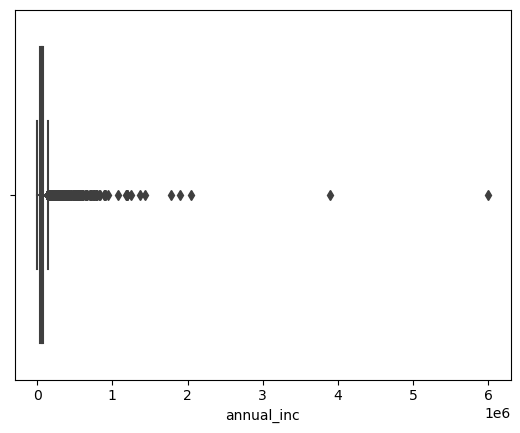

In [29]:
#analyse outliers in annual_inc using boxplot
sns.boxplot(x=df['annual_inc'])

In [30]:
df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [31]:
df['annual_inc'].quantile([0.90, 0.95, 0.97,0.98, 0.99])

0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [32]:
df.shape

(38577, 19)

In [33]:
# From above we can say that there are outliers and hence should be removed
df = df[df['annual_inc'] <= df['annual_inc'].quantile(0.95)]
df.shape

(36654, 19)

<Axes: xlabel='annual_inc'>

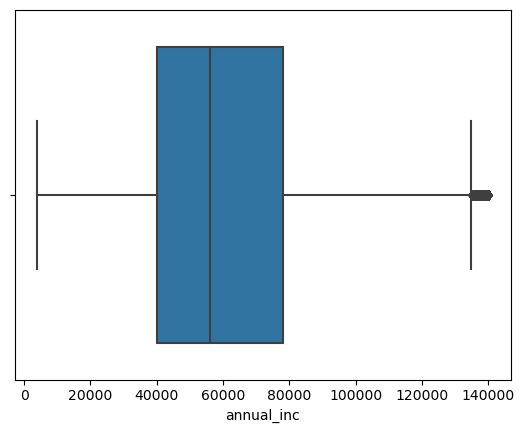

In [34]:
sns.boxplot(x=df['annual_inc'])

## Derived Variables

Let's create new columns from date type columns

In [35]:
#creating new column 'month' and 'year' from 'issue_d' column
df["issue_d_year"] = df.issue_d.dt.year
df['issue_d_month'] = df.issue_d.dt.strftime('%b')

In [36]:
## Let's see the approved loan amount percentage with the help of 'funded_amnt_inv' and 'loan_amnt' by creating new column
df['approved_loan_amt_percent'] = round(df.funded_amnt_inv*100/df.loan_amnt,2)

Binning the data to analyse more efficiently.

In [37]:
# categorise loan amounts into buckets which will help in analysis further.
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df['annual_inc_bin'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
df['int_rate_bin'] = pd.cut(df['int_rate'], [5, 10, 15, 20], labels=['5-10', '10-15', '15-20'])

# categorise dti into buckets for bivariate analysis.
df['dti_bin'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '05-10', '10-15', '15-20', '20-25','25-30'])

In [38]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month,approved_loan_amt_percent,loan_amnt_bin,annual_inc_bin,int_rate_bin,dti_bin
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,AZ,27.65,0.0,2011,Dec,99.5,0-7000,20000-40000,10-15,25-30
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,GA,1.00,0.0,2011,Dec,100.0,0-7000,20000-40000,15-20,0-5
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,IL,8.72,0.0,2011,Dec,100.0,0-7000,0-20000,15-20,05-10
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,CA,20.00,0.0,2011,Dec,100.0,7000-14000,40000-60000,10-15,15-20
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,AZ,11.20,0.0,2011,Dec,100.0,0-7000,20000-40000,5-10,10-15


In [39]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
df['loan_status_count'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month,approved_loan_amt_percent,loan_amnt_bin,annual_inc_bin,int_rate_bin,dti_bin,loan_status_count
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,27.65,0.0,2011,Dec,99.5,0-7000,20000-40000,10-15,25-30,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,1.00,0.0,2011,Dec,100.0,0-7000,20000-40000,15-20,0-5,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,8.72,0.0,2011,Dec,100.0,0-7000,0-20000,15-20,05-10,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,20.00,0.0,2011,Dec,100.0,7000-14000,40000-60000,10-15,15-20,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,11.20,0.0,2011,Dec,100.0,0-7000,20000-40000,5-10,10-15,0


# Univariate Analysis

## Quantitative Variables

Distribution of loan amount, funded amount and funded amount by investor

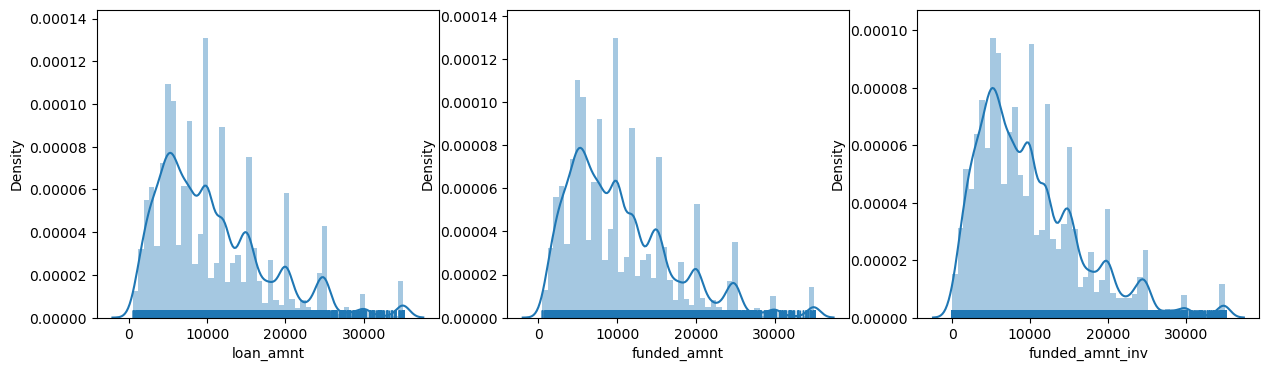

In [40]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['loan_amnt'],rug = True)
plt.subplot(1,3,2)
sns.distplot(df['funded_amnt'],rug = True)
plt.subplot(1,3,3)
sns.distplot(df['funded_amnt_inv'],rug = True)
plt.show()

### Observations
- Amount distribution looks very similar. So we can use <b>loan_amnt</b> for our further analysis.

## Analyzing Loan amount

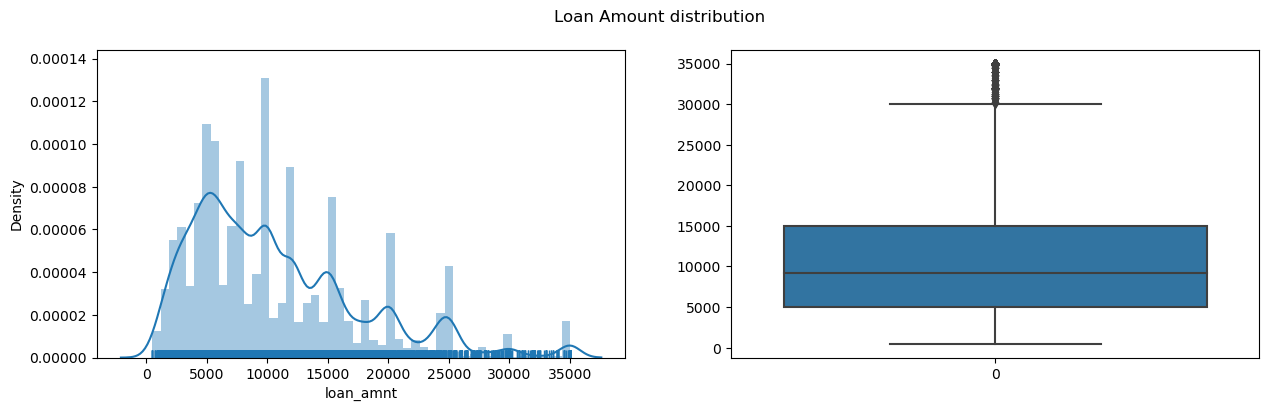

In [41]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(a=df.loan_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.loan_amnt)
plt.suptitle('Loan Amount distribution')
plt.show()

### Observations
- Most of the people have taken their loan between 5000 and 15000

## Analyzing Interest Rate

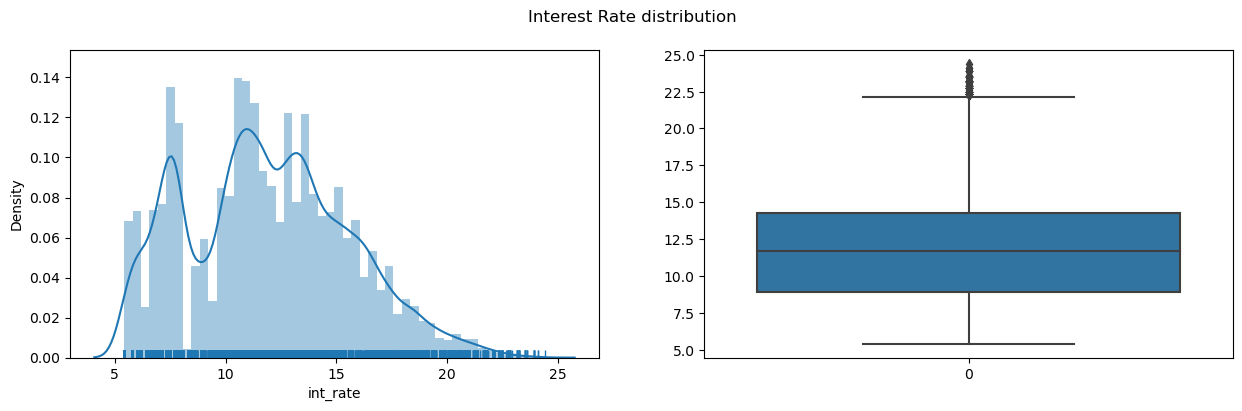

In [42]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(a=df.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.int_rate)
plt.suptitle('Interest Rate distribution')
plt.show()

### Observations
- Most of the interest rate lies between 9% to 14.5%.

## Analyzing Annual Income

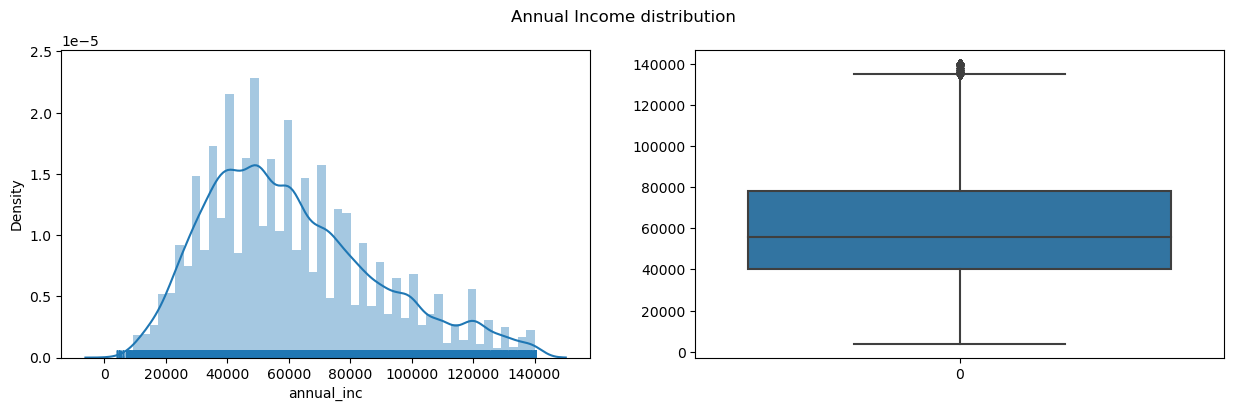

In [43]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(a=df.annual_inc, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.annual_inc)
plt.suptitle('Annual Income distribution')
plt.show()

### Observations
- Most of the borrower's annual income are in the range of 40k to 80k.

In [44]:
df["issue_d_month"].value_counts()

issue_d_month
Dec    4019
Nov    3820
Oct    3533
Sep    3291
Aug    3215
Jul    3196
Jun    3008
May    2788
Apr    2713
Mar    2552
Jan    2268
Feb    2251
Name: count, dtype: int64

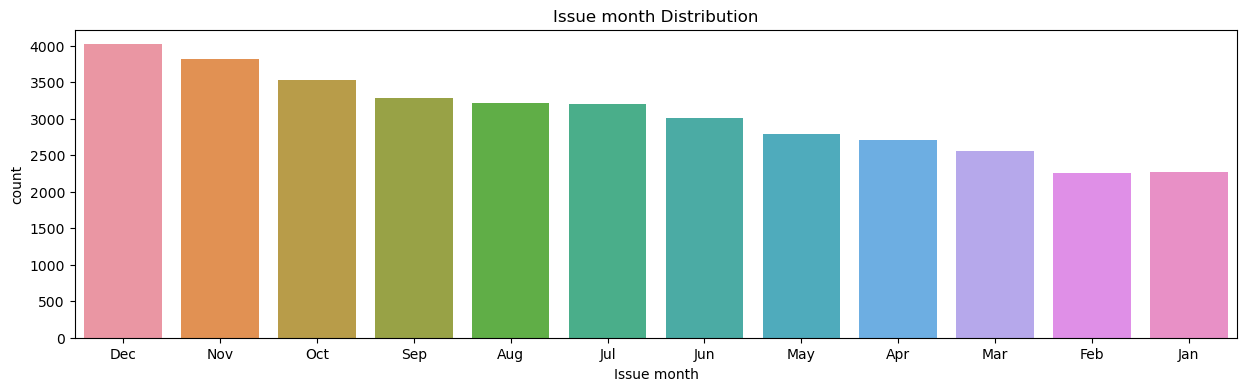

In [45]:
plt.figure(figsize=(15,4))
sns.countplot(x=df["issue_d_month"])
plt.xlabel("Issue month")
plt.ylabel('count')
plt.title('Issue month Distribution')
plt.show()

### Observations
- Issue of loan increases every month from Jan to Dec

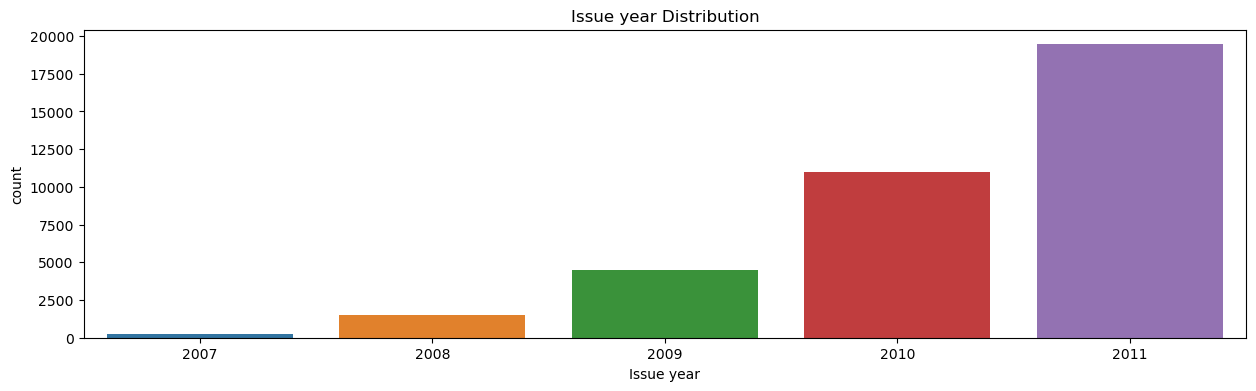

In [46]:
plt.figure(figsize=(15,4))
sns.countplot(x=df["issue_d_year"])
plt.xlabel("Issue year")
plt.ylabel('count')
plt.title('Issue year Distribution')
plt.show()

### Observations
- Every year the number of loans are almost doubled

# Unordered Categorical Variables

## Analyzing Loan Status

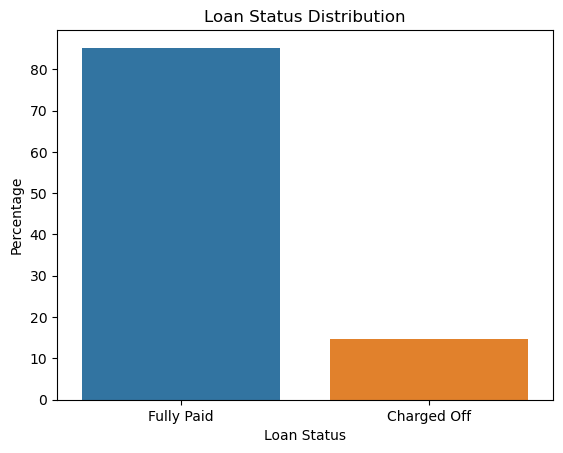

In [47]:
# Converting value_count into percentage
ls = df["loan_status"].value_counts(normalize=True).mul(100).round(1)

sns.barplot(x=ls.index, y=ls.values)
plt.xlabel("Loan Status")
plt.ylabel("Percentage")
plt.title("Loan Status Distribution")
plt.show()

### Observations 
- 85.7% have fully paid whereas 14.3% are charged off

## Analyzing Purpose of Loan

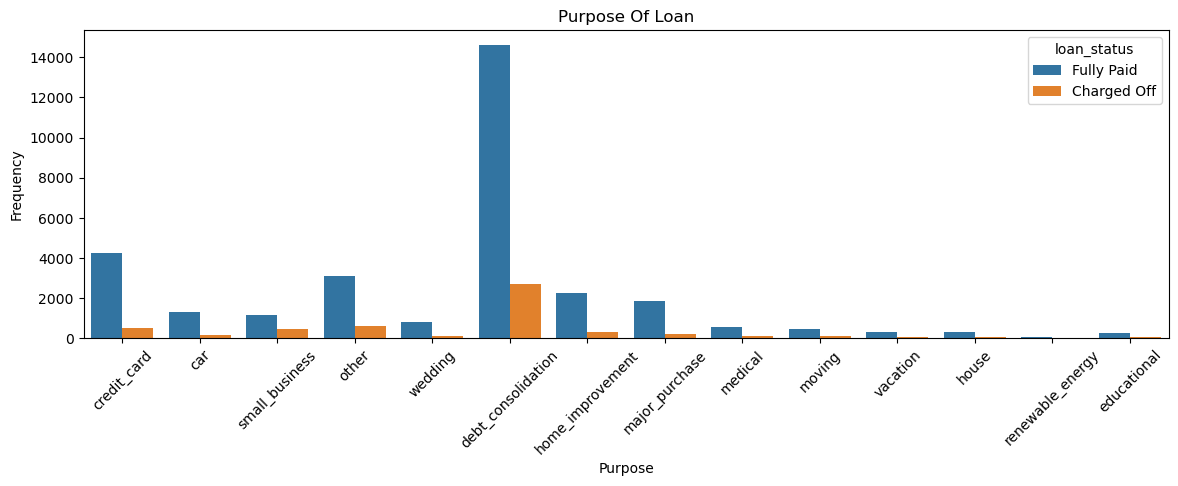

In [48]:
plt.figure(figsize=(14,4))
ax = sns.countplot(x="purpose", data=df, hue= 'loan_status')
ax.set_title('Purpose Of Loan')
ax.set_ylabel('Frequency')
ax.set_xlabel('Purpose')  
plt.xticks(rotation=45)
plt.show()

###  Observations
- Most of the borrowers have taken loan for debt consolidation and paying credit card bills
- Charged Off loan status is high for debt consolidation

## Analyzing Home Ownership

<Figure size 1400x300 with 0 Axes>

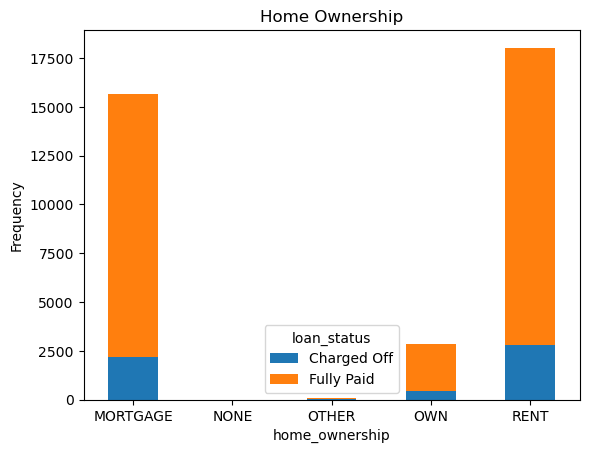

In [49]:
plt.figure(figsize=(14,3))
df.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.title("Home Ownership",fontdict={'fontsize':12})
plt.xlabel("home_ownership")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

###  Observations
- Most of the borrowers have taken loan who are staying in rented home or have mortgaged their home
- Charged Off loan status is high for these home ownerships


# Ordered Categorical Variables

## Analyzing Loan paying term

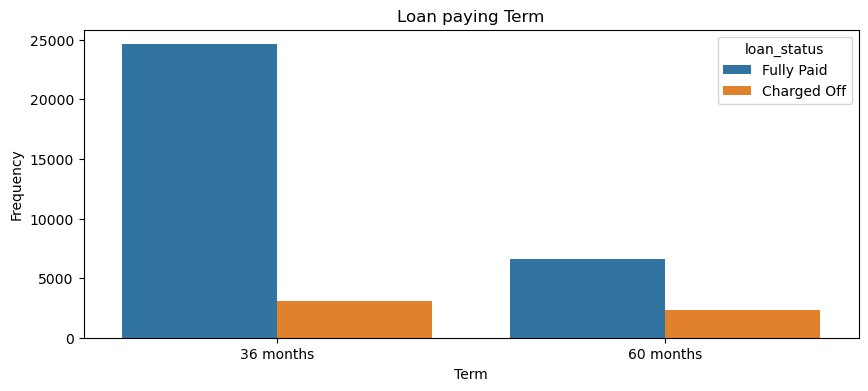

In [50]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x="term", data=df, hue= 'loan_status')
ax.set_title('Loan paying Term')
ax.set_ylabel('Frequency')
ax.set_xlabel('Term')  
plt.show()

###  Observations
- Most of the borrowers have taken loan for 36 months as compared to 60 months term
- Charged Off loan status is high for 60 months term as compared to 36 months term


# Segmented Univariate Analysis

<Figure size 1000x400 with 0 Axes>

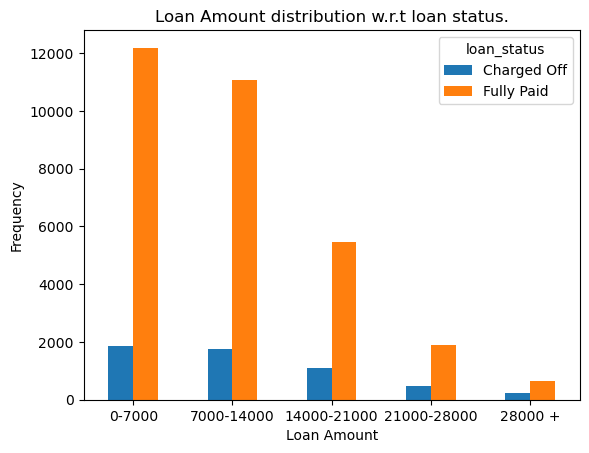

In [51]:
plt.figure(figsize=(10,4))
df.groupby('loan_amnt_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.title("Loan Amount distribution w.r.t loan status.")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

### Observations
- Most of the borrowers take or are given loan amount upto 14K 
- Charged off status is high for these amounts


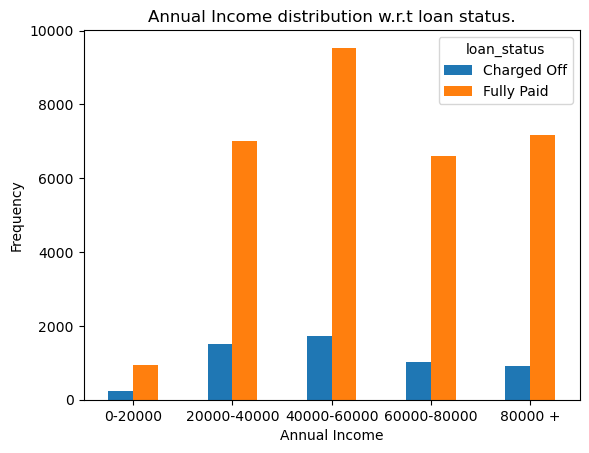

In [52]:
df.groupby('annual_inc_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.title("Annual Income distribution w.r.t loan status.")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

### Observations
- Most of the borrower's annual income is in the range of 40K to 60K
- Charged off status is high for these annual income amounts


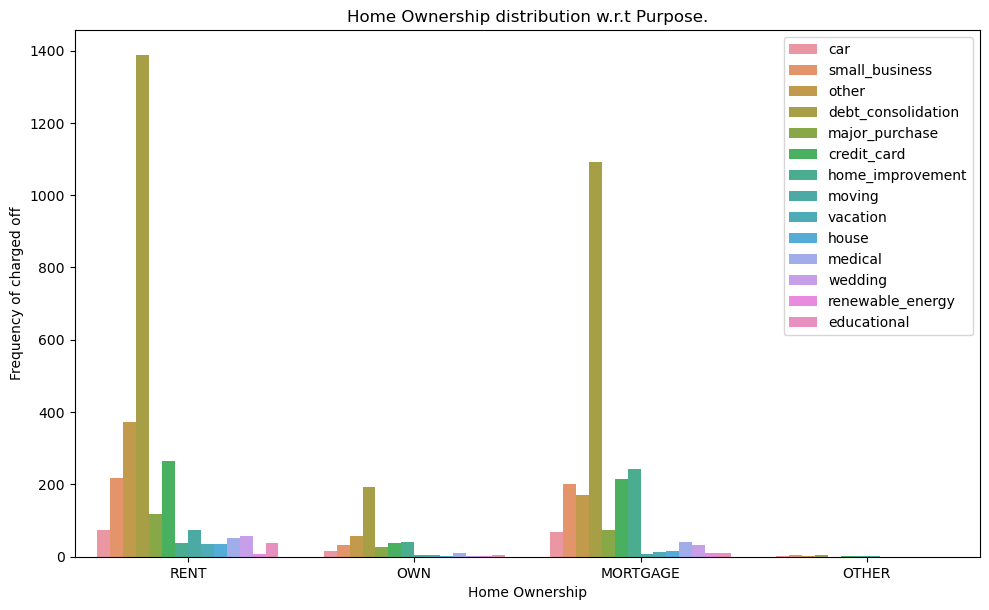

In [53]:
#home ownership and loan purpose for defaulted
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership',hue= 'purpose',data=df[df['loan_status']=='Charged Off'])
plt.tight_layout()
plt.title("Home Ownership distribution w.r.t Purpose.")
plt.xlabel("Home Ownership")
plt.ylabel("Frequency of charged off")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### Observations
- Most of the borrowers who took loan for the purpose of debt consolidation have highest number of Charged off status and those who are in rent as the most


# Bivariate Analysis

Let's analyse <b>Loan amount</b> with every variables.

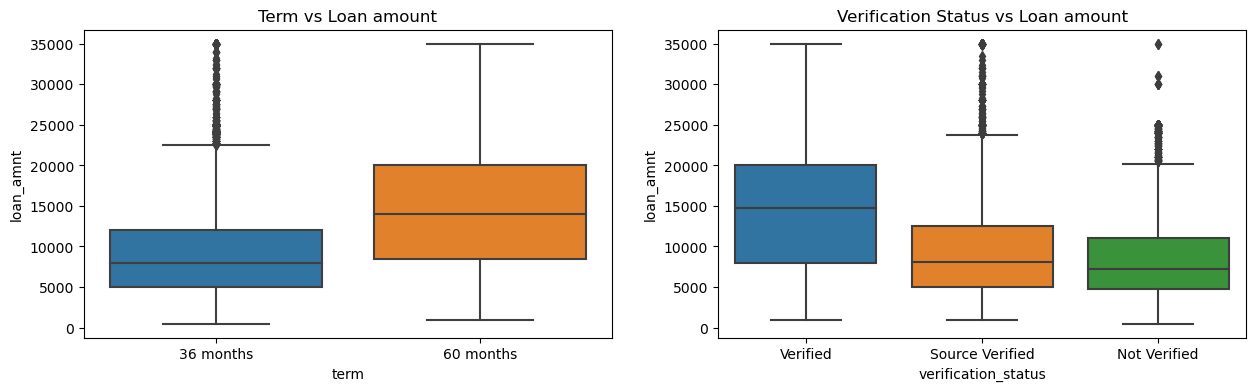

In [54]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="loan_amnt", data=df)
plt.title("Term vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="loan_amnt", data=df)
plt.title("Verification Status vs Loan amount")
plt.show()

### Observations
- Term Vs Loan amount: More the loan amount higher is the tenure i.e. 60 months. The median for 60 months is 15K whereas the median for 36 month is 8K
- Verification status vs Loan amount: Verified borrowers gets more loan amount than Not Verified and Source Verified. Borrowers with higher loan amount are verified

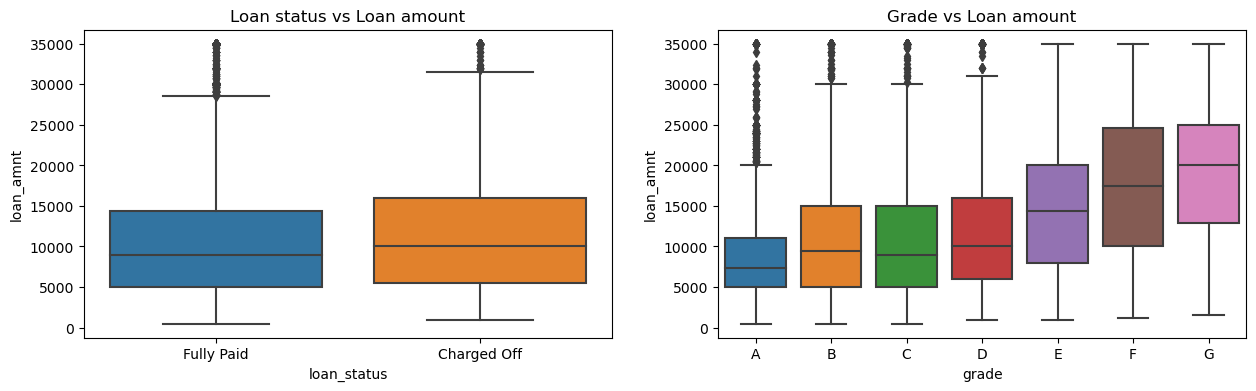

In [55]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="loan_amnt", data=df)
plt.title("Loan status vs Loan amount")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = df["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="loan_amnt", order= grade_order, data=df)
plt.title("Grade vs Loan amount")
plt.show()

### Observations
- Loan status Vs Loan Amount: Charged off were having higher loan amount than fully paid
- Grade vs Loan Amount: Grade F & G are having max amount of loan, as the grade decreases amount of loan is increasing
- Inference: Higher the grade more is the risk of default

Text(0.5, 1.0, 'Home Ownership vs Loan amount')

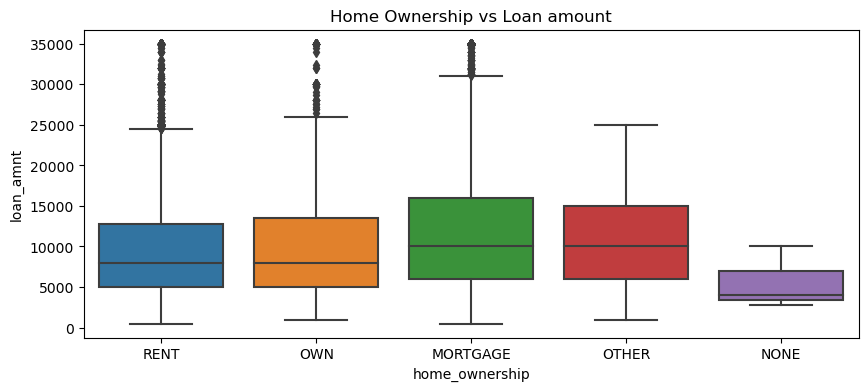

In [56]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="loan_amnt", data=df)
plt.title("Home Ownership vs Loan amount")

### Observations
- The borrowers who have mortgaged their homes have taken higher amount of loan

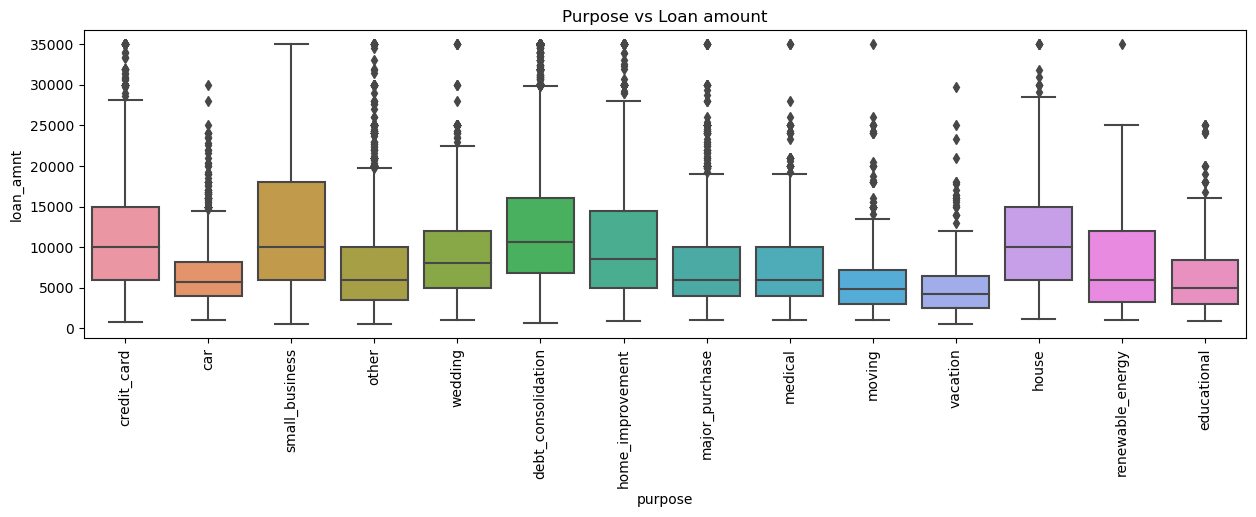

In [57]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="loan_amnt", data=df)
plt.title("Purpose vs Loan amount")
plt.xticks(rotation=90)
plt.show()

### Observations
- Small business purpose borrowers are taking high amounts of loan than others 
- Debt consolidation purpose borrowers as well

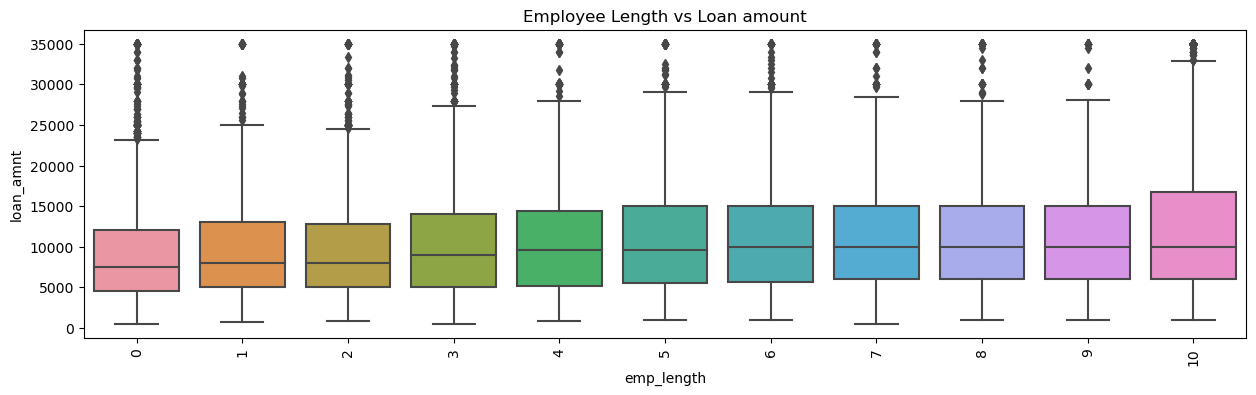

In [58]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="loan_amnt", data=df)
plt.title("Employee Length vs Loan amount")
plt.xticks(rotation=90)
plt.show()

### Observations
- The borrowers who have 10 or 10+ years of experience are taking high amounts of loan than others
- The borrowers with less than 2 years of experience are taking lesser amount of loan compared to others

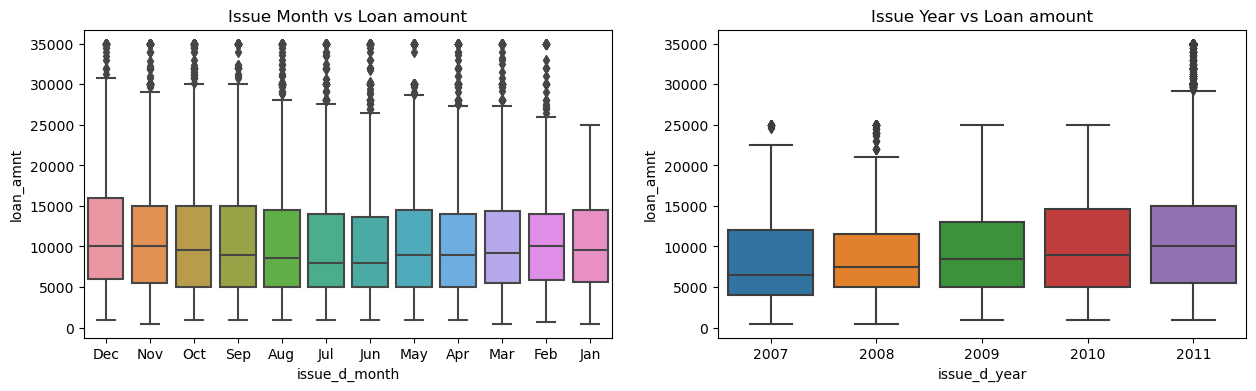

In [59]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="issue_d_month", y="loan_amnt", data=df)
plt.title("Issue Month vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="issue_d_year", y="loan_amnt", data=df)
plt.title("Issue Year vs Loan amount")
plt.show()

### Observations
- Issue Month Vs Loan Amount: Highest amounts of loan are taken in the month of Dec and May for which median value doesn't vary too much.
- Issue Year vs Loan Amount: Highest amounts of loan are taken in the year 2010 and 2011 as can be seen as outliers. Median value doesn't vary too much but as the year increases high amount of loans are taken.

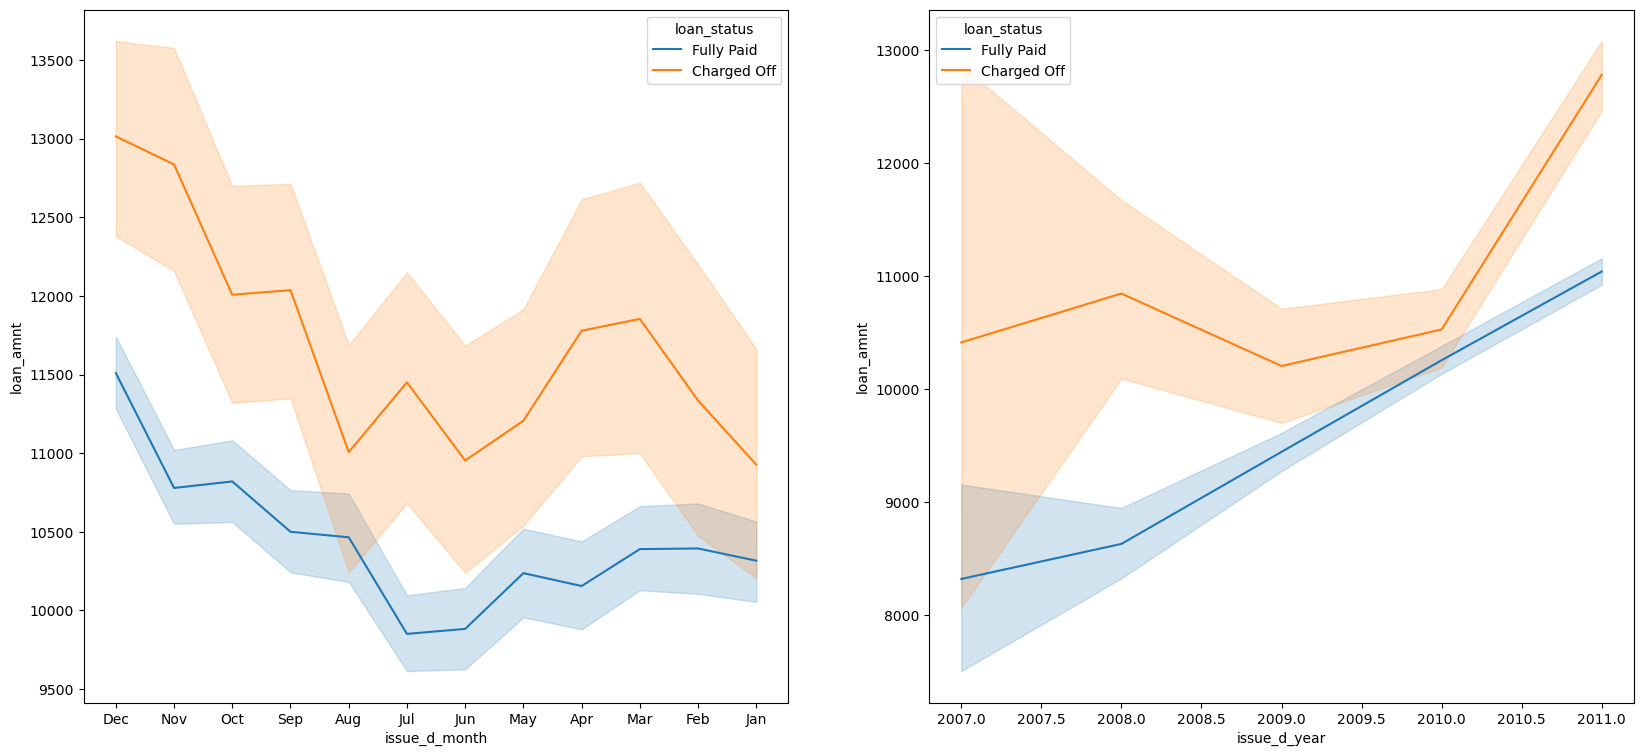

In [60]:
plt.figure(figsize=(20,9))
plt.subplot(121)
sns.lineplot(data =df ,y='loan_amnt', x='issue_d_month', hue ='loan_status')
plt.subplot(122)
sns.lineplot(data =df ,y='loan_amnt', x='issue_d_year', hue ='loan_status')
plt.show()

### Observations
- Charged off frequency is high for higher amounts
- The borrower who took the loan in the months of October, November and December are having highest charged off ratio

Let's analyse <b>Annual Income</b> with every variables.

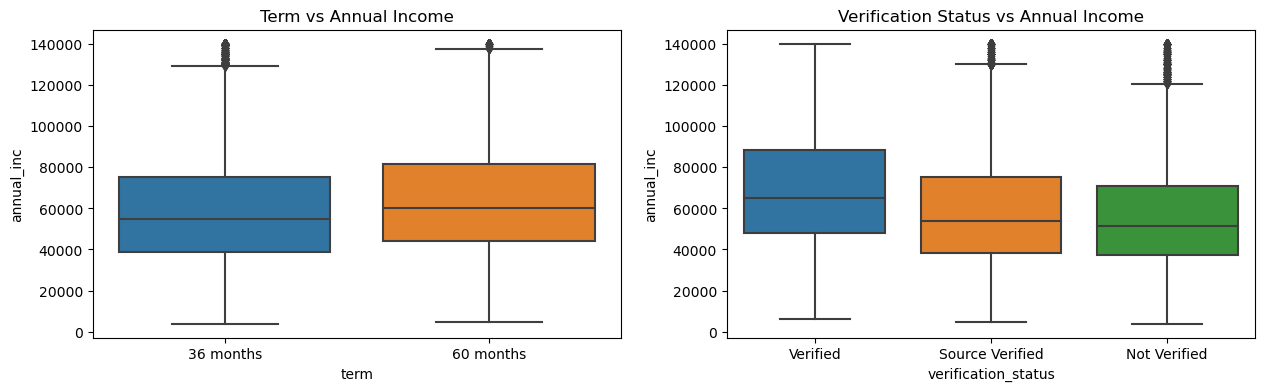

In [61]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="annual_inc", data=df)
plt.title("Term vs Annual Income")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="annual_inc", data=df)
plt.title("Verification Status vs Annual Income")
plt.show()

### Observations
- Term vs Annual Income: The borrowers who have high annual income are taking loans for 60 months tenure as compared to 36 months
- Verification Status vs Annual Income: Higher annual income borrowers are mostly verified

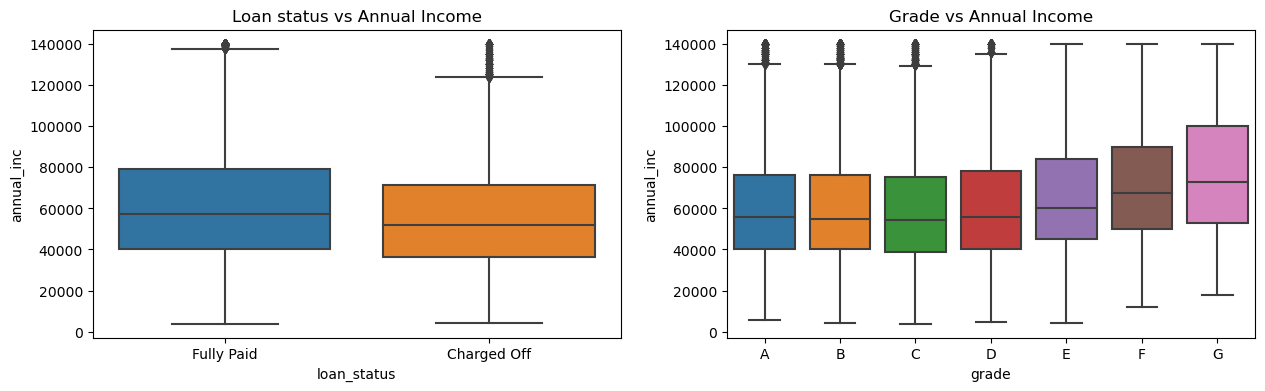

In [62]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="annual_inc", data=df)
plt.title("Loan status vs Annual Income")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = df["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="annual_inc", order= grade_order, data=df)
plt.title("Grade vs Annual Income")
plt.show()

### Observations
- Loan Status Vs Annual Income: The borrowers with annual incomes between 40K and 75K have a high tendency to default
- Grade Vs Annual Income: The borrowers with higher annual incomes are graded as F or G

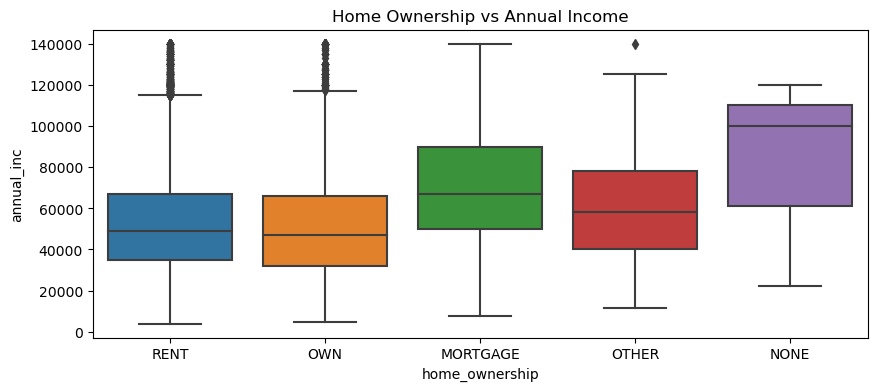

In [63]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="annual_inc", data=df)
plt.title("Home Ownership vs Annual Income")
plt.show()

### Observations
- The borrowers who have mortgaged their homes are having high average annual income

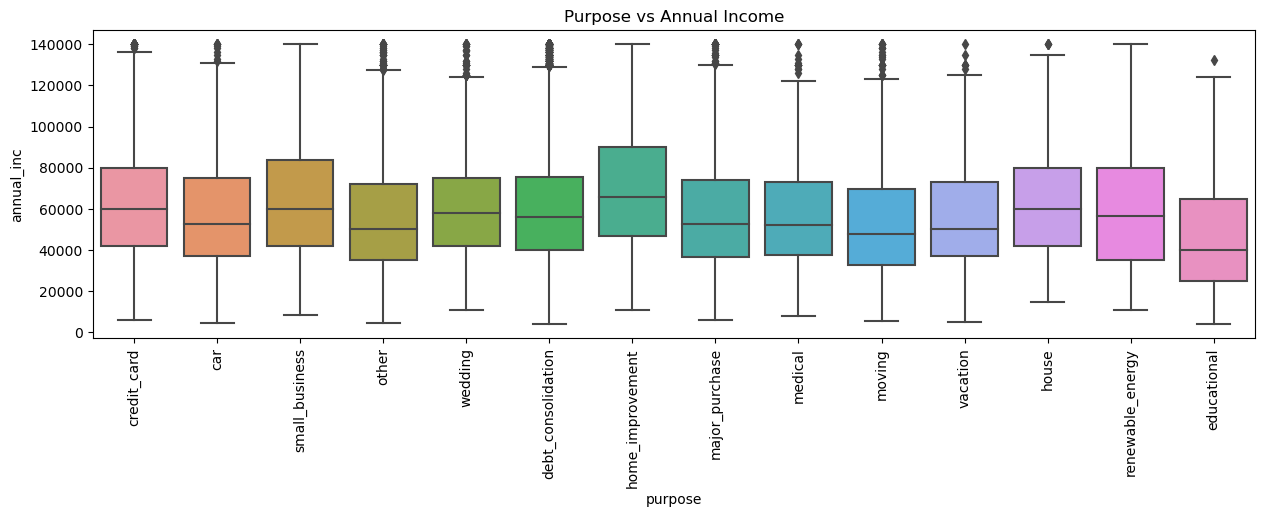

In [64]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="annual_inc", data=df)
plt.title("Purpose vs Annual Income")
plt.xticks(rotation=90)
plt.show()

### Observations
- The borrowers who have high annual income are taking loans mostly for home improvement and small business

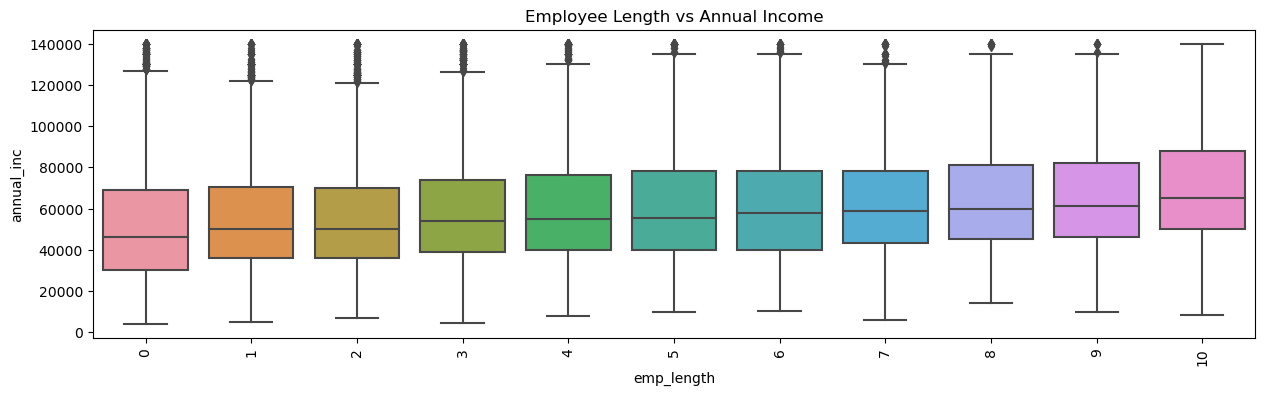

In [65]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="annual_inc", data=df)
plt.title("Employee Length vs Annual Income")
plt.xticks(rotation=90)
plt.show()

### Observations
- The borrowers who have 10 or 10+ years of experience are having highest annual income than others 
- The borrowers with less than 1 year of experience are having the least

Let's segment <b>Interest Rate</b> with every variables.

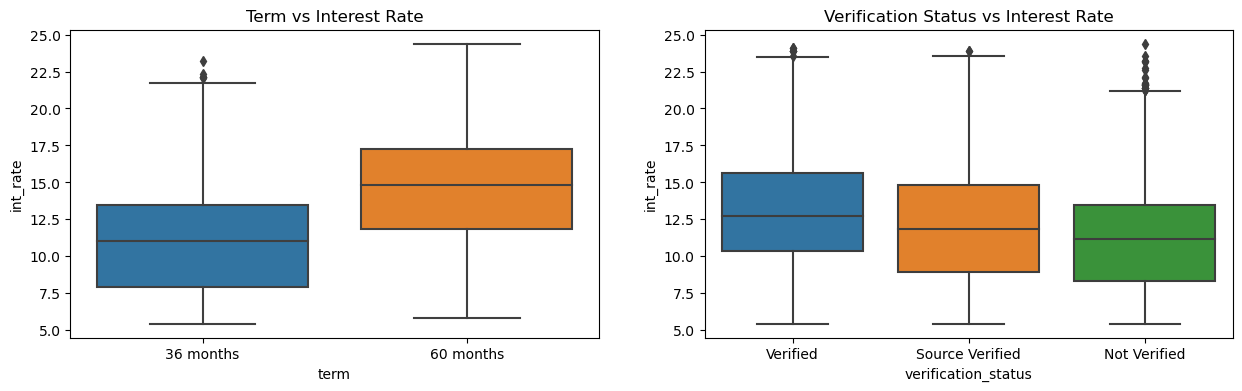

In [66]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="int_rate", data=df)
plt.title("Term vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="int_rate", data=df)
plt.title("Verification Status vs Interest Rate")
plt.show()

### Observations
- Term Vs Interest Rate: Interest rate is less for those who take loan for 36 months and higher for 60 months
- Verification Status Vs Interest Rate: Verified borrowers gets more loan at higher interest rate as compared to others

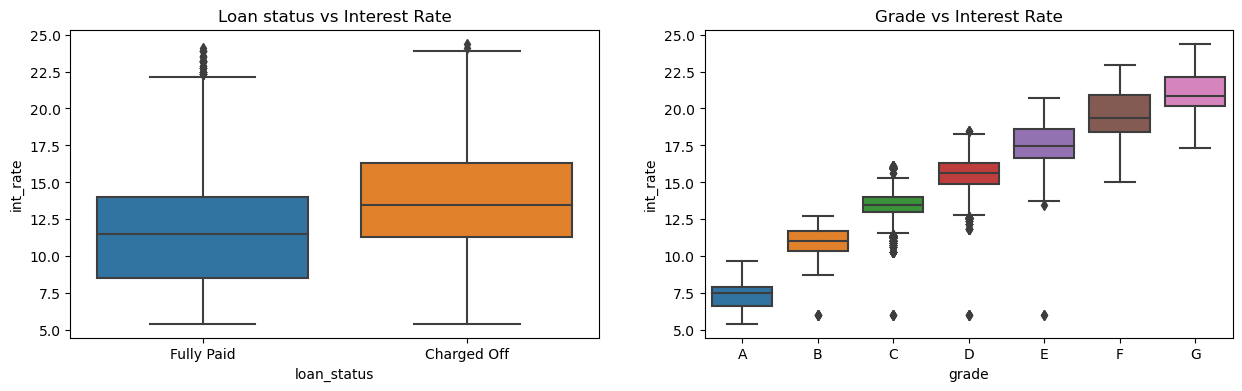

In [67]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="int_rate", data=df)
plt.title("Loan status vs Interest Rate")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = df["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="int_rate", order= grade_order, data=df)
plt.title("Grade vs Interest Rate")
plt.show()

### Observations
- Loan Status Vs Interest Rate: The borrowers who have high interest rate are mostly defaulters
- Grade Vs Interest Rate: As the grade decreases, interest rate is also increasing

Text(0.5, 1.0, 'Home Ownership vs Interest Rate')

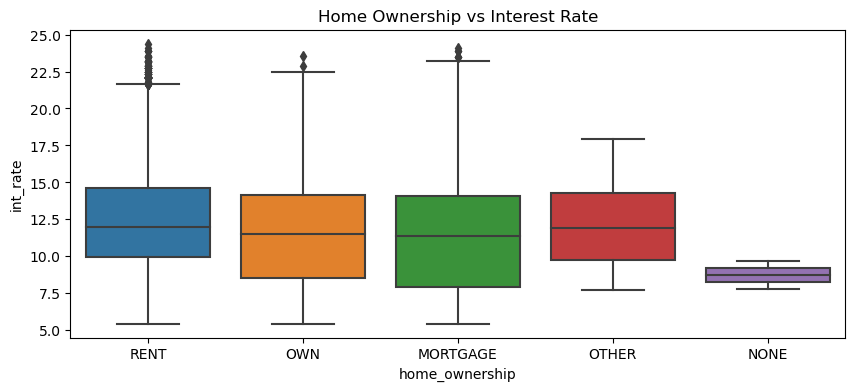

In [69]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="int_rate", data=df)
plt.title("Home Ownership vs Interest Rate")

### Observations
- The borrowers who are in rented homes are getting high interest rate
- The borrowers with own homes and mortgaged homes are getting loan with less interest rate

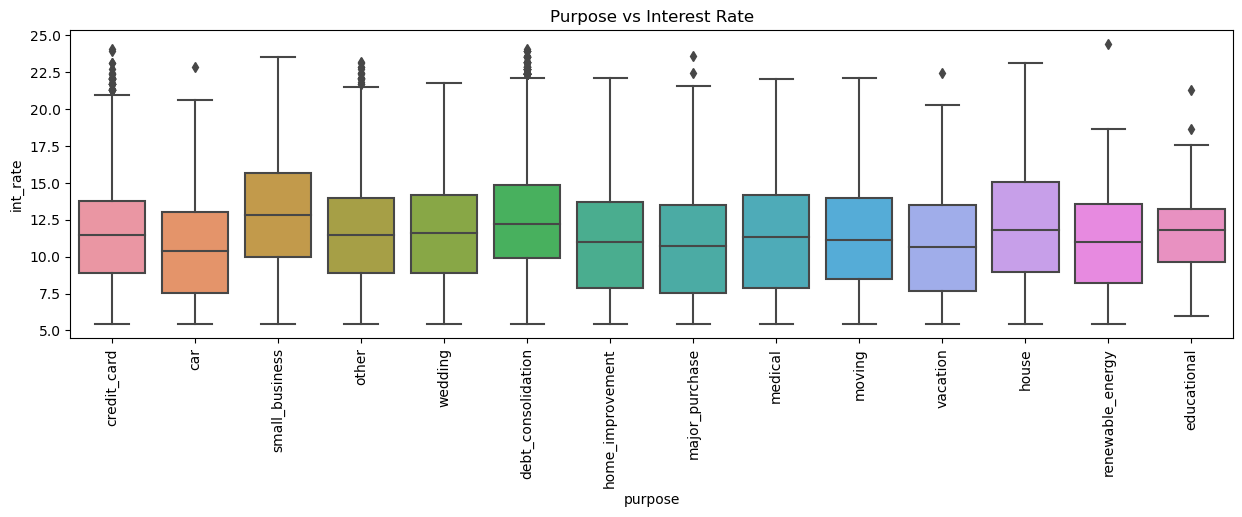

In [70]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="int_rate", data=df)
plt.title("Purpose vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

### Observations
- The borrowers who take loan for the purpose of small business, debt consolidation, house and educational are getting loan at high interest rate than others

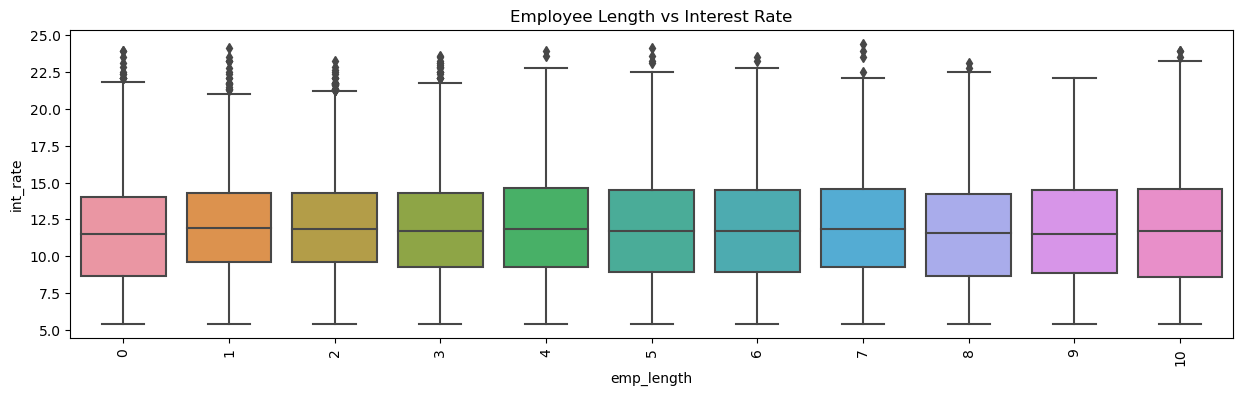

In [71]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="int_rate", data=df)
plt.title("Employee Length vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

### Observations
- There is not much difference in interest rate for various employee lengths

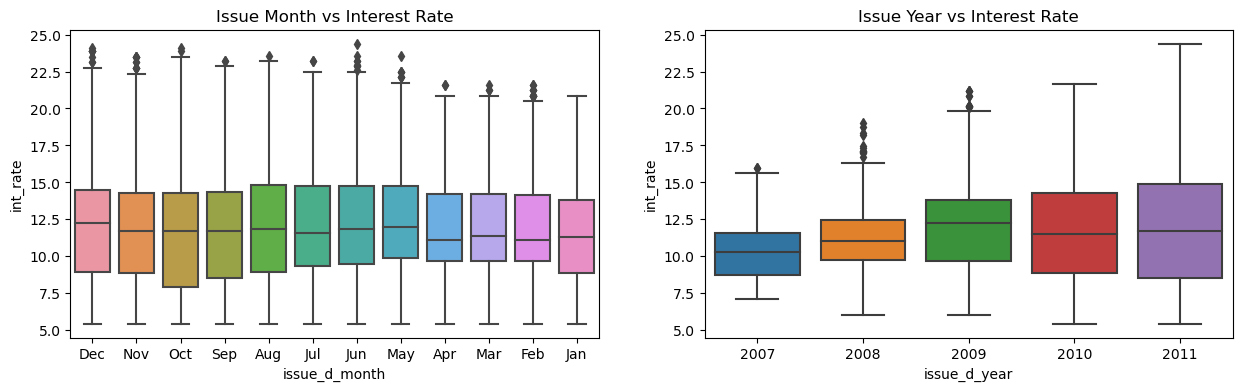

In [72]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="issue_d_month", y="int_rate", data=df)
plt.title("Issue Month vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="issue_d_year", y="int_rate", data=df)
plt.title("Issue Year vs Interest Rate")
plt.show()

### Observations
- Issue Month Vs Interest Rate: The rate of interest for the months from Jan to April are less as compared to other months, April being the least
- Issue Year Vs Interest Rate: The rate of interest is diversified across all years, but the median almost remains the same

Let's segment <b>Debt to income ratio</b> with every variables.

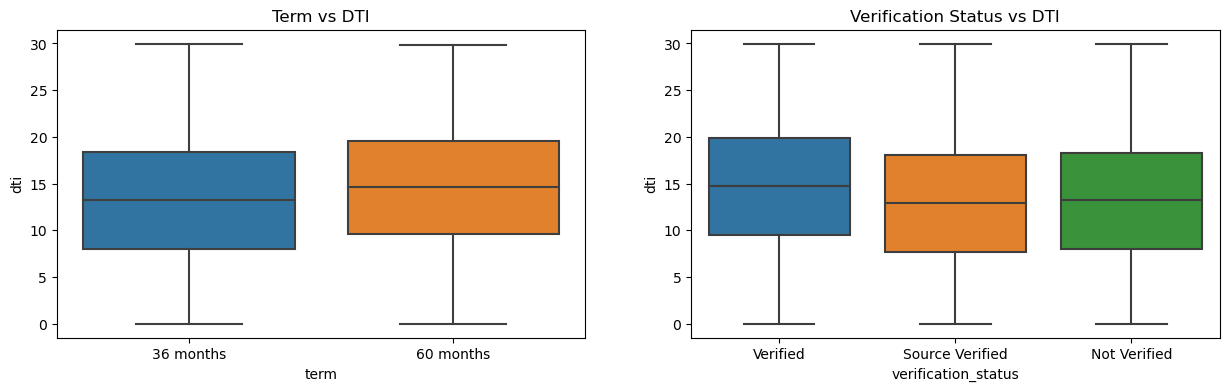

In [73]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="dti", data=df)
plt.title("Term vs DTI")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="dti", data=df)
plt.title("Verification Status vs DTI")
plt.show()

### Observations
- Term Vs DTI: DTI ratio is high for the borrowers who has 60 months term
- Verification Status vs DTI: Verified borrowers are having high DTI ratio

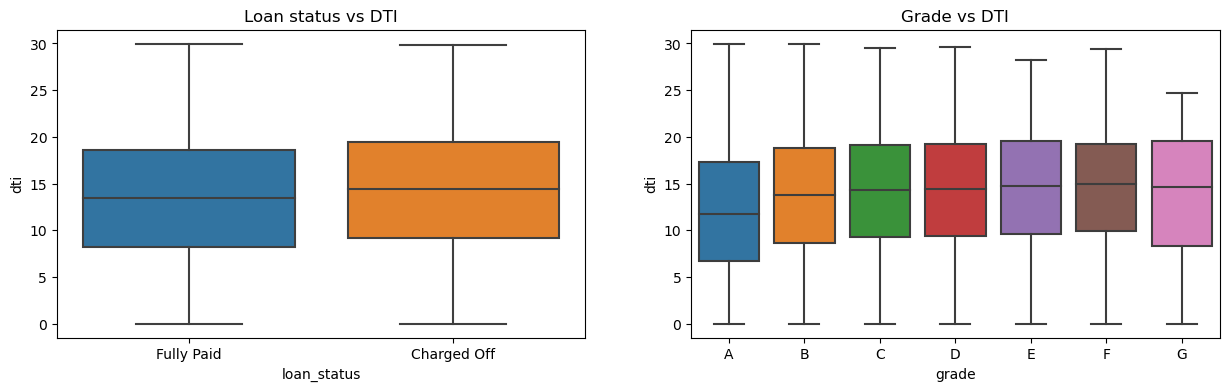

In [74]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="dti", data=df)
plt.title("Loan status vs DTI")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = df["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="dti", order= grade_order, data=df)
plt.title("Grade vs DTI")
plt.show()

### Observations
- Most of the charged off borrowers are having high DTI ratio.
- As grade decreases DTI ratio increases

Text(0.5, 1.0, 'Home Ownership vs DTI')

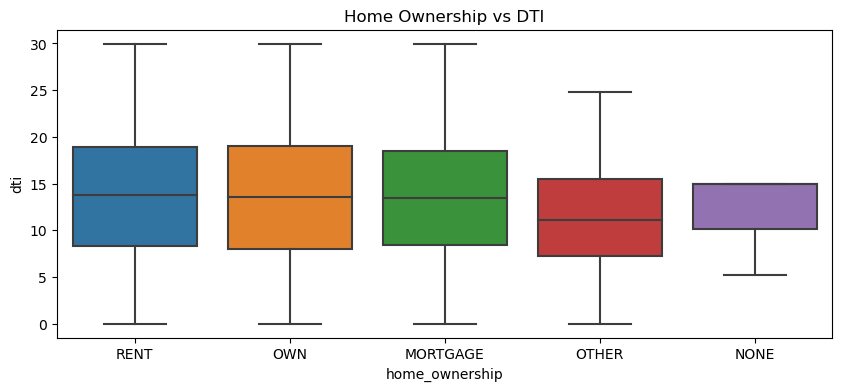

In [75]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="dti", data=df)
plt.title("Home Ownership vs DTI")

### Observations
- The borrowers with own home and rented home are having high DTI ratio than others

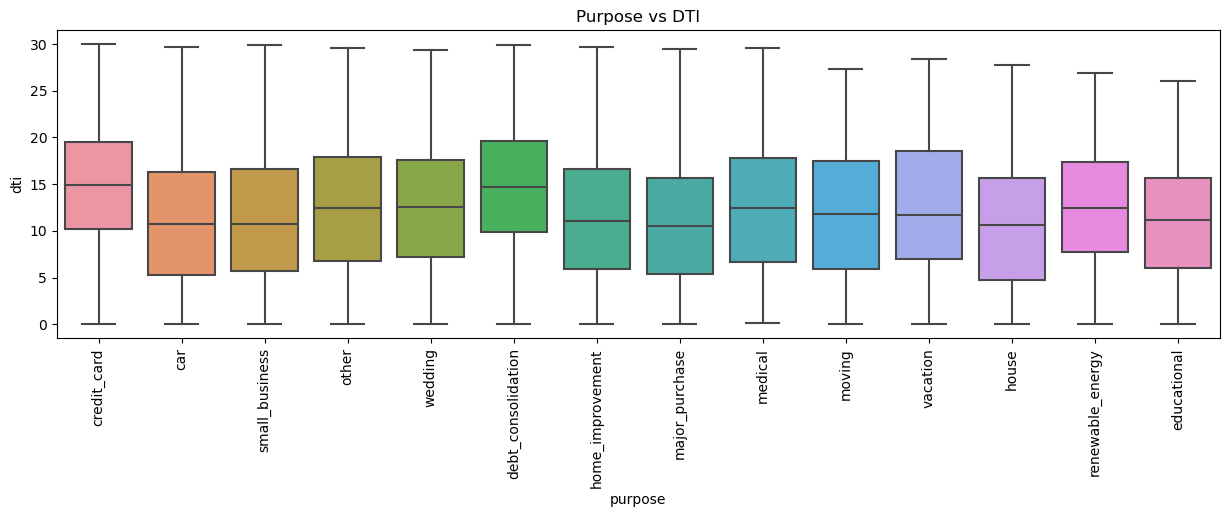

In [76]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="dti", data=df)
plt.title("Purpose vs DTI")
plt.xticks(rotation=90)
plt.show()

### Observations
- The borrowers who take loan for the purpose of debt consolidation and credit card are having high DTI ratio than others

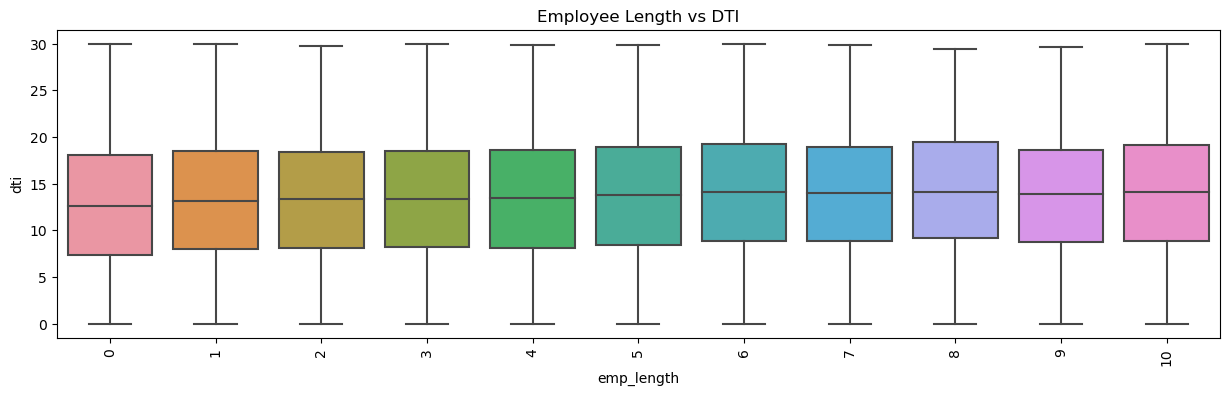

In [77]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="dti", data=df)
plt.title("Employee Length vs DTI")
plt.xticks(rotation=90)
plt.show()

### Observations
- There is no relation between employee length and DTI ratio

Now, Let us analyse Charged Off Proportion with each variables.

In [152]:
#grouping annual income bin and loan status
annual_inc_bin_vs_loan_status = df.groupby(['annual_inc_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
#creating "Total" variable
annual_inc_bin_vs_loan_status['Total'] = annual_inc_bin_vs_loan_status['Charged Off'] + annual_inc_bin_vs_loan_status['Fully Paid'] 
#calculating chargedoff proportion
annual_inc_bin_vs_loan_status['Chargedoff_Proportion'] = annual_inc_bin_vs_loan_status['Charged Off'] / annual_inc_bin_vs_loan_status['Total']
#sorting the chargedoff proportion in descending order
annual_inc_bin_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_bin,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,943,1180,0.200847
1,20000-40000,1514,7004,8518,0.177741
2,40000-60000,1729,9534,11263,0.153511
3,60000-80000,1024,6597,7621,0.134366
4,80000 +,914,7158,8072,0.113231


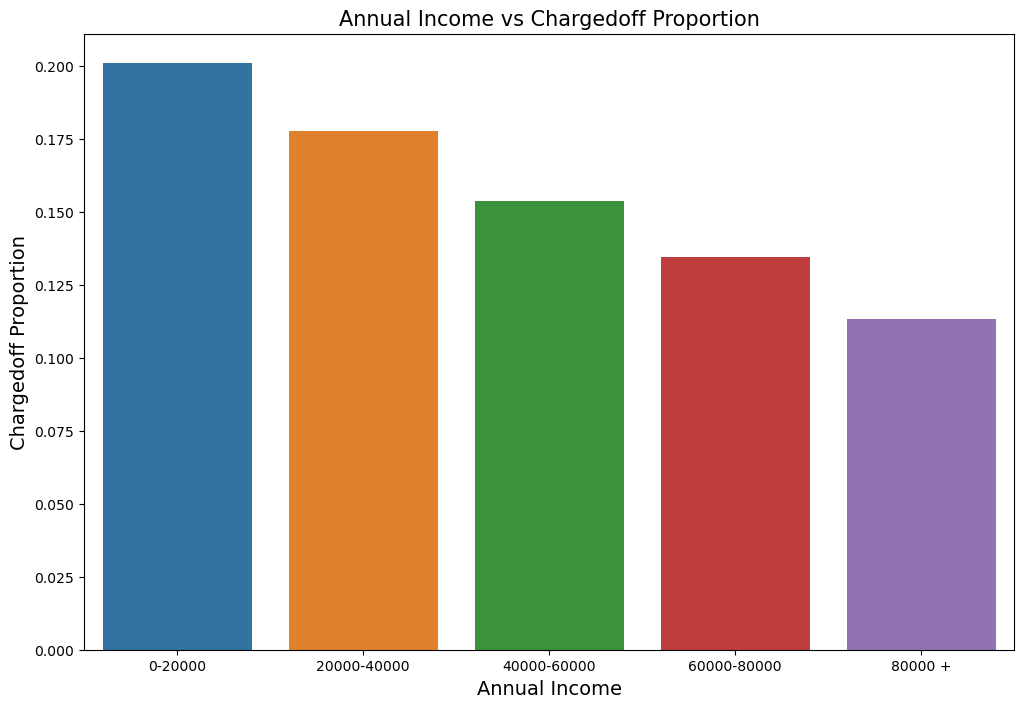

In [153]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15)
#barplot
ax1=sns.barplot(x='annual_inc_bin', y='Chargedoff_Proportion', data=annual_inc_bin_vs_loan_status)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()

### Observations
- As annual income is increases charged off proportion is decreases
- Highest charged off are for borrowers whose annual income is in the range 0 to 20K

In [78]:
purpose_vs_loan_status = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan_status['Total'] = purpose_vs_loan_status['Charged Off'] + purpose_vs_loan_status['Fully Paid'] 
purpose_vs_loan_status['Chargedoff_Proportion'] = purpose_vs_loan_status['Charged Off'] / purpose_vs_loan_status['Total']
purpose_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,454,1169,1623,0.279729
10,renewable_energy,18,77,95,0.189474
3,educational,54,258,312,0.173077
8,moving,90,460,550,0.163636
9,other,605,3094,3699,0.163558
5,house,55,283,338,0.162722
7,medical,104,537,641,0.162246
2,debt_consolidation,2677,14628,17305,0.154695
12,vacation,52,313,365,0.142466
4,home_improvement,322,2234,2556,0.125978


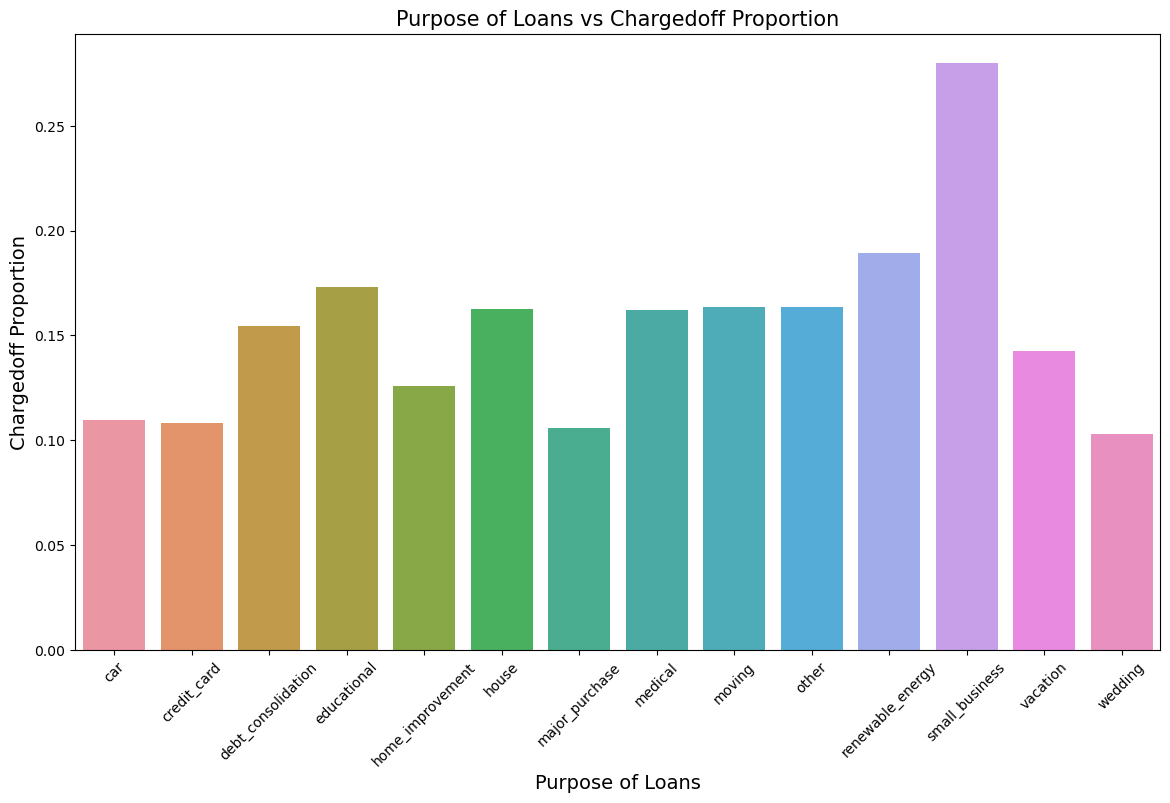

In [80]:
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(y='Chargedoff_Proportion', x='purpose', data=purpose_vs_loan_status)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
ax1.set_xlabel('Purpose of Loans',fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Observations
- The borrowers who take loan for the purpose of small-business has the maximum charged off proportion

In [81]:
grade_vs_loan_status = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan_status['Total'] = grade_vs_loan_status['Charged Off'] + grade_vs_loan_status['Fully Paid'] 
grade_vs_loan_status['Chargedoff_Proportion'] = grade_vs_loan_status['Charged Off'] / grade_vs_loan_status['Total']
grade_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,95,166,261,0.363985
5,F,289,597,886,0.326185
4,E,660,1788,2448,0.269608
3,D,1080,3755,4835,0.223371
2,C,1325,6156,7481,0.177115
1,B,1376,9721,11097,0.123997
0,A,593,9053,9646,0.061476


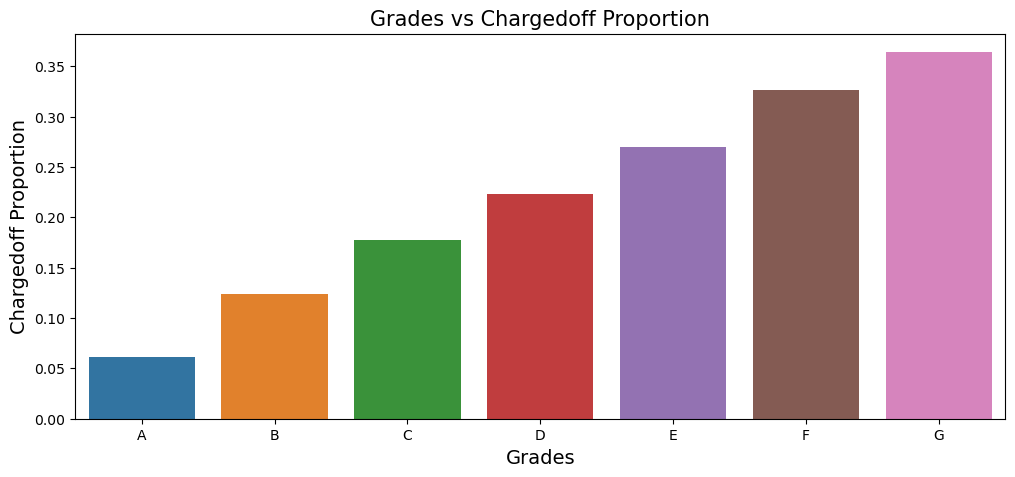

In [82]:
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan_status)
ax1.set_xlabel('Grades',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

### Observations
- As grades are decreasing charged off proportion is increasing

In [83]:
sub_grade_vs_loan_status = df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
sub_grade_vs_loan_status['Total'] = sub_grade_vs_loan_status['Charged Off'] + sub_grade_vs_loan_status['Fully Paid'] 
sub_grade_vs_loan_status['Chargedoff_Proportion'] = sub_grade_vs_loan_status['Charged Off'] / sub_grade_vs_loan_status['Total']
sub_grade_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
29,F5,50,48,98,0.510204
32,G3,19,21,40,0.475000
34,G5,9,13,22,0.409091
31,G2,26,40,66,0.393939
30,G1,30,58,88,0.340909
28,F4,46,93,139,0.330935
26,F2,67,150,217,0.308756
23,E4,117,275,392,0.298469
27,F3,46,110,156,0.294872
25,F1,80,196,276,0.289855


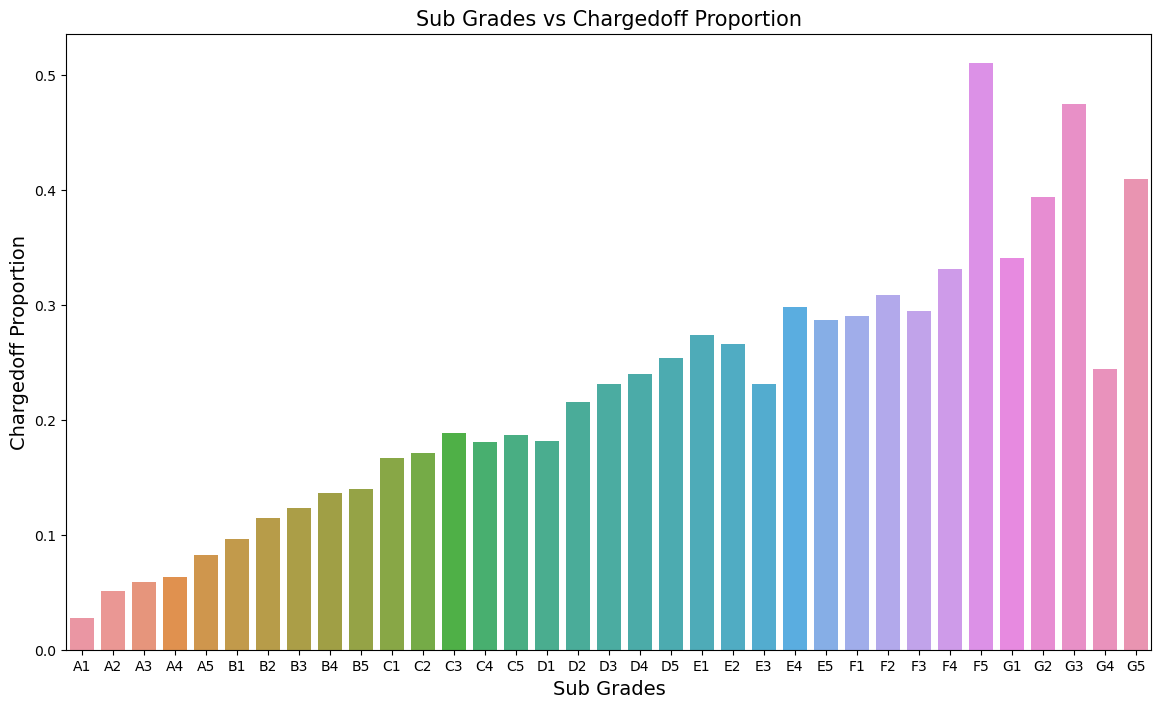

In [84]:
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=sub_grade_vs_loan_status)
ax1.set_xlabel('Sub Grades',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

### Observations
- Subgrade F5, G3 and G5 are having maximum charged off proportion

In [85]:
int_rate_bin_vs_loan_status = df.groupby(['int_rate_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_rate_bin_vs_loan_status['Total'] = int_rate_bin_vs_loan_status['Charged Off'] + int_rate_bin_vs_loan_status['Fully Paid'] 
int_rate_bin_vs_loan_status['Chargedoff_Proportion'] = int_rate_bin_vs_loan_status['Charged Off'] / int_rate_bin_vs_loan_status['Total']
int_rate_bin_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_bin,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,15-20,1706,5074,6780,0.251622
1,10-15,2632,14745,17377,0.151465
0,5-10,812,11012,11824,0.068674


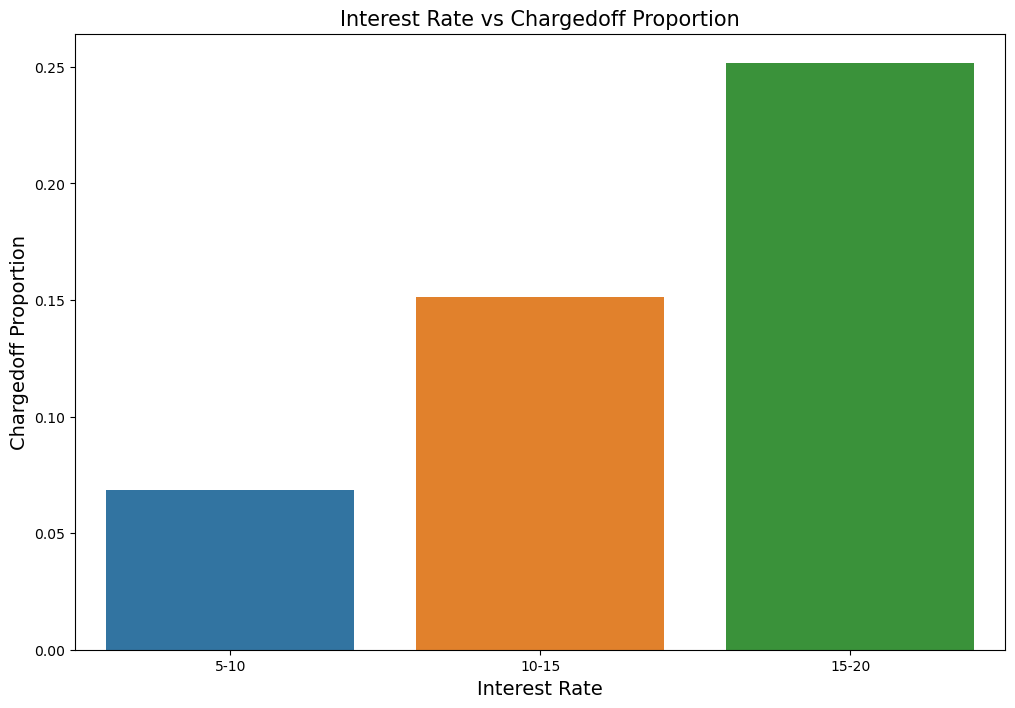

In [86]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='int_rate_bin', y='Chargedoff_Proportion', data=int_rate_bin_vs_loan_status)
ax1.set_xlabel('Interest Rate',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

### Observations
- As interest rate are increasing, charged off proportion is also increasing
- The borrowers who takes loan at the interest rate of 15 to 20 are defaulting

In [87]:
emp_length_vs_loan_status = df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_length_vs_loan_status['Total'] = emp_length_vs_loan_status['Charged Off'] + emp_length_vs_loan_status['Fully Paid'] 
emp_length_vs_loan_status['Chargedoff_Proportion'] = emp_length_vs_loan_status['Charged Off'] / emp_length_vs_loan_status['Total']
emp_length_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
10,10,1270,6618,7888,0.161004
0,0,842,4499,5341,0.157648
7,7,252,1392,1644,0.153285
1,1,449,2594,3043,0.147552
5,5,441,2603,3044,0.144875
8,8,194,1149,1343,0.144453
6,6,294,1779,2073,0.141823
3,3,536,3288,3824,0.140167
4,4,443,2757,3200,0.138437
2,2,547,3554,4101,0.133382


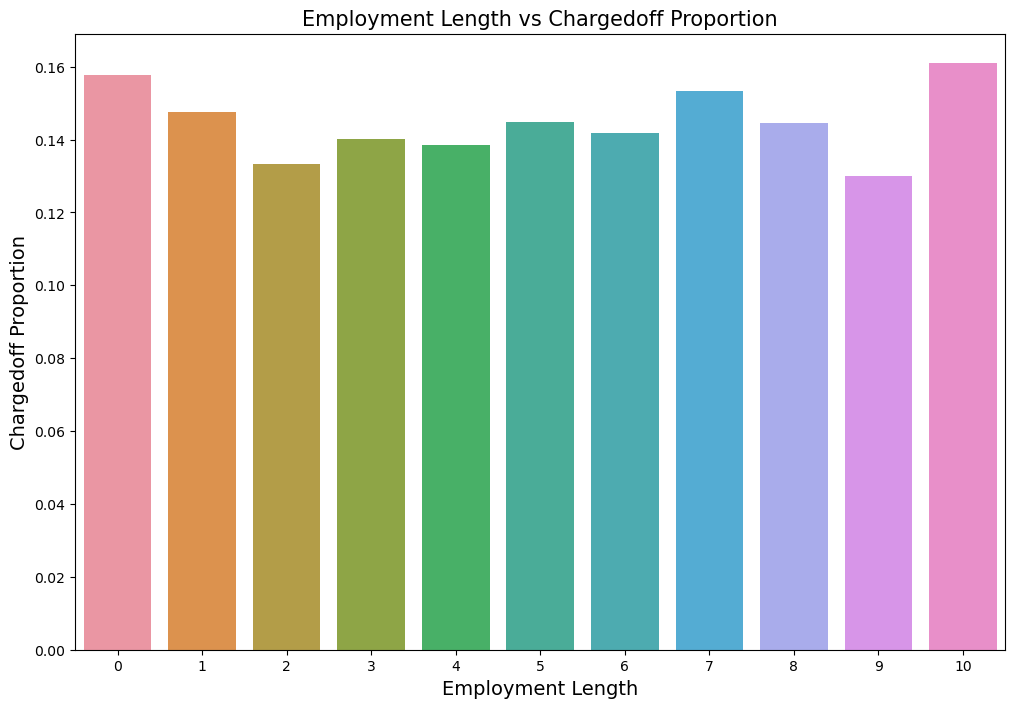

In [88]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emp_length_vs_loan_status)
ax1.set_xlabel('Employment Length',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

### Observations
- The borrowers whose employee length is less than 1 year, 10 and 10+ years are mostly defaulting

In [89]:
addr_state_vs_loan_status = df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan_status['Total'] = addr_state_vs_loan_status['Charged Off'] + addr_state_vs_loan_status['Fully Paid'] 
addr_state_vs_loan_status['Chargedoff_Proportion'] = addr_state_vs_loan_status['Charged Off'] / addr_state_vs_loan_status['Total']
addr_state_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.0,2.0,5.0,0.600000
32,NV,103.0,354.0,457.0,0.225383
13,ID,1.0,4.0,5.0,0.200000
40,SD,12.0,50.0,62.0,0.193548
0,AK,13.0,58.0,71.0,0.183099
9,FL,485.0,2167.0,2652.0,0.182881
11,HI,28.0,132.0,160.0,0.175000
24,MO,111.0,536.0,647.0,0.171561
31,NM,30.0,147.0,177.0,0.169492
36,OR,70.0,358.0,428.0,0.163551


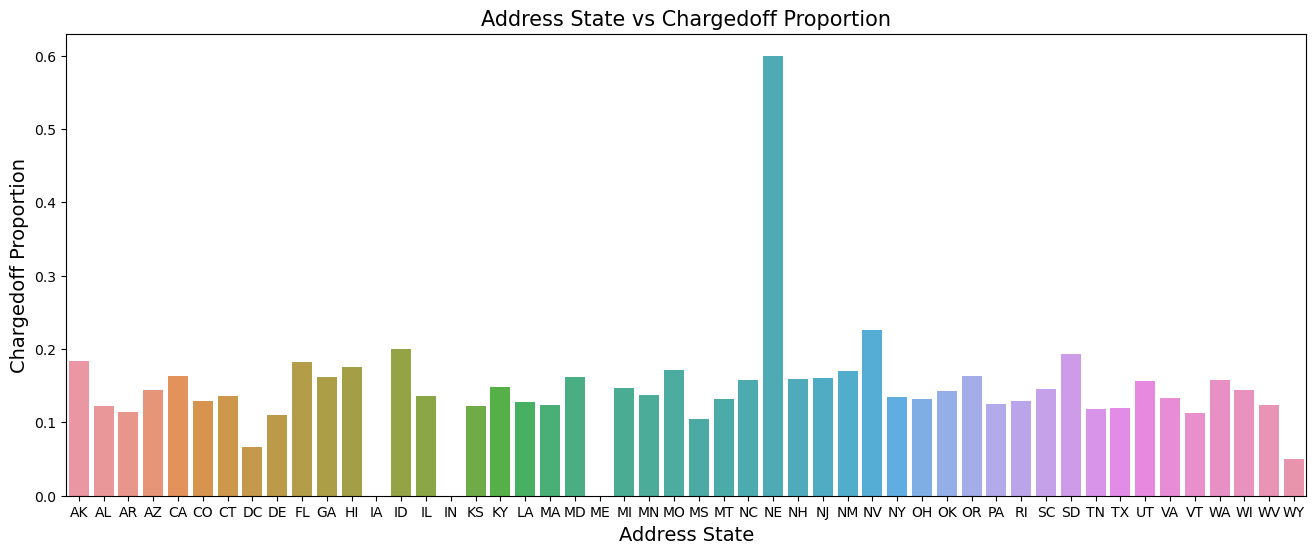

In [90]:
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan_status)
ax1.set_xlabel('Address State',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

### Observations
- The borrowers who are from NE are defaulting the most

In [91]:
verification_status_vs_loan_status = df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verification_status_vs_loan_status['Total'] = verification_status_vs_loan_status['Charged Off'] + verification_status_vs_loan_status['Fully Paid'] 
verification_status_vs_loan_status['Chargedoff_Proportion'] = verification_status_vs_loan_status['Charged Off'] / verification_status_vs_loan_status['Total']
verification_status_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,Verified,1949,9270,11219,0.173723
1,Source Verified,1373,7782,9155,0.149973
0,Not Verified,2096,14184,16280,0.128747


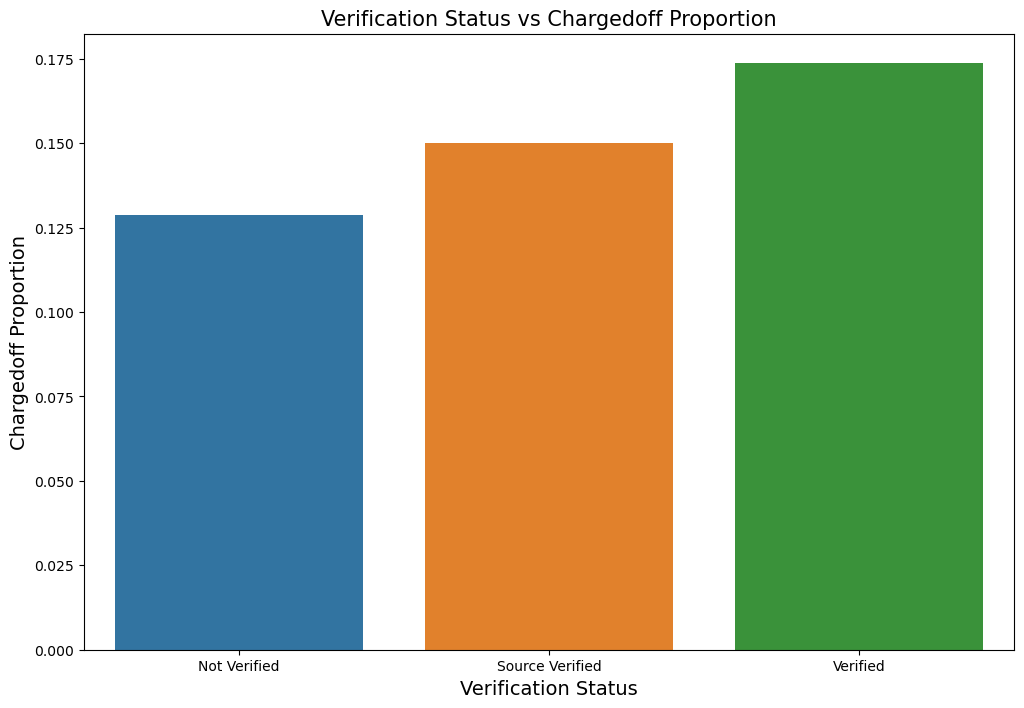

In [92]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verification_status_vs_loan_status)
ax1.set_xlabel('Verification Status',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

### Observations
- Most of the verified borrowers are defaulting

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36654 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   loan_amnt                  36654 non-null  int64         
 1   funded_amnt                36654 non-null  int64         
 2   funded_amnt_inv            36654 non-null  float64       
 3   term                       36654 non-null  object        
 4   int_rate                   36654 non-null  float64       
 5   installment                36654 non-null  float64       
 6   grade                      36654 non-null  object        
 7   sub_grade                  36654 non-null  object        
 8   emp_length                 36654 non-null  int32         
 9   home_ownership             36654 non-null  object        
 10  annual_inc                 36654 non-null  float64       
 11  verification_status        36654 non-null  object        
 12  issue_d  

# Multivariate Analysis

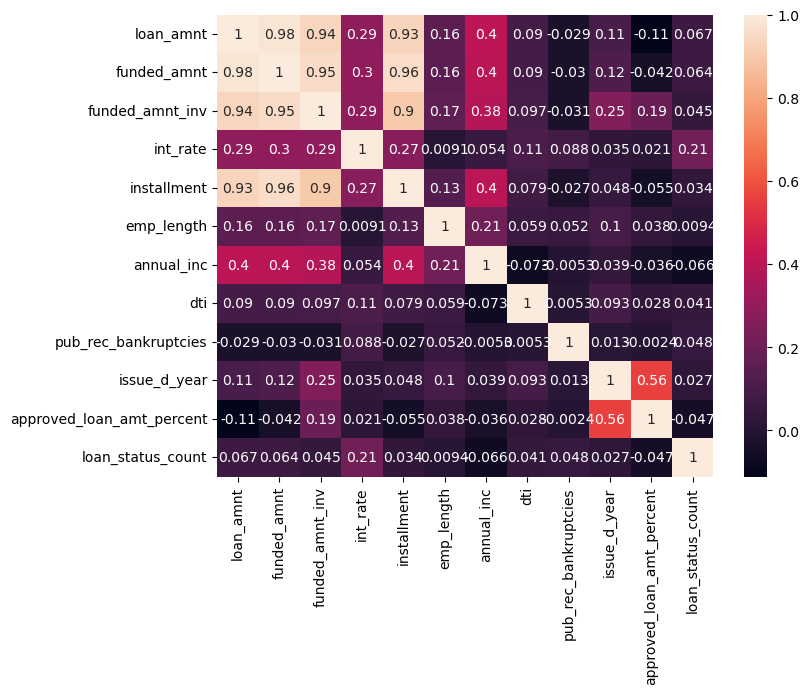

In [94]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "emp_length", "annual_inc", "dti", "pub_rec_bankruptcies", "issue_d_year", "approved_loan_amt_percent", "loan_status_count"]].corr(),annot=True)
plt.show()

##### Observations
- <b>loan_amnt , funded_amnt , funded_amnt_inv , installment</b> are strongly correlated.
- <b>annual_inc and dti</b> is negatively correlated.
- Debt income ratio is the percentage of a borrower's monthly gross income that goes toward paying debts. 
- Which means when annual_inc is low, debt is high and vice versa.

# Recommendations

### There is more probability of defaulting when
- Borrowers are taking loan for the term 60 months
- Borrowers who take loan amount in the range 0 to 14000
- Borrowers whose annual income is low i.e. (0-20000)
- Borrowers who are having home ownership as ‘Rent’ and take loan for the purpose of debt consolidation
- Borrowers who take loan for the purpose of small business
- Borrowers who have a high DTI ratio
- Borrowers who are categorized in lower Grades i.e. F & G
- Borrowers who are further sub-categorized in subgrades F5,G3 & G5
- Borrowers who are given loan at interest rate in the range 15%-20%
- Borrowers whose employee length is 1 or less and 10 or 10+ years
- Borrowers who are from the state of NE
- Borrowers who are verified (verification process should be made better)






